<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Introducción al Aprendizaje Automático</h3>
<hr>
<h4>Por David Gonzalez <leonardo.david.gonzalez@gmail.com> y Facundo Díaz Cobos <facundo.diaz.cobos@gmail.com></h4>
</center>
<br/>

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

Attributes:
 Name    Description
 TARGET  Label: 1 = client defaulted on loan - 0 = loan repaid
 LOAN    Amount of the loan request
 MORTDUE Amount due on existing mortgage
 VALUE   Value of current property
 YOJ     Years at present job
 DEROG   Number of major derogatory reports
 DELINQ  Number of delinquent credit lines
 CLAGE   Age of oldest trade line in months
 NINQ    Number of recent credit lines
 CLNO    Number of credit lines
 DEBTINC Debt-to-income ratio

In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import itertools
from ml.visualization import plot_confusion_matrix, plot_learning_curve

np.random.seed(0)  # Para mayor determinismo

## Carga de datos

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [48]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")
display(dataset.head())

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


## Ejercicio 1: División de datos en conjuntos de entrenamiento y evaluación

La primer tarea consiste en dividir el conjunto de datos cargados en el apartado anterior en conjuntos de entrenamiento (o *training*) y evaluación (o *test*).

El primero será utilizado para la creación/selección del modelo de clasificación. El segundo se utilizará sólo al final (una vez elegidos los mejores hiperparámetros) para ver cuál es el resultado final del modelo sobre un conjunto de datos independiente.

<hr>
Como podemos obvservar las filas se encuentran ordenadas por el label TARGET, por lo que antes de dividir el dataset en entrenamiento y evaluacion debemos o bien desordenar el dataset o elegir un metodo de eleccion de las filas aleatorio. Optamos por elegir el método train_test_split de la libreria sklearn que los elige aleatoriamente.

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
print("El conjunto de entrenamiento tiene " + str(X_train.shape[0]) + " filas")
print("El conjunto de evaluación tiene " + str(X_test.shape[0]) + " filas")

El conjunto de entrenamiento tiene 1483 filas
El conjunto de evaluación tiene 371 filas


## Ejercicio 2: Elección de un modelo

Basándose en lo visto en el teórico escojan y justifiquen un modelo de aprendizaje automático. Recuerden que los pasos para elegir un modelo son: 

#### Selección de hipótesis, regularizador y función de coste.

Vamos a elegir un clasificador lineal un support vector machine (SVM) con el estimador de descenso de gradiente estocástico.
En Particular vamos a usar la implementacion de sklearn SGDClassifier.

Es posible implementar varios regularizadores dentro de los llamados descenso de gradiente estocástico...

El regularizador es una penalización añadida a la función de pérdida que reduce los parámetros del modelo hacia el vector cero utilizando la **norma euclidiana cuadrada** L2 o la **norma absoluta** L1 o una combinación de ambos (**Red elástica**).

Las ventajas de [DGE](http://scikit-learn.org/stable/modules/sgd.html) según [sklearn](http://scikit-learn.org/stable/modules/sgd.html):
       * Eficiencia.
       * Fácil implmentacion.

Desventajas:
       * Requiere varios hiper parámetros


Vamos a elegir el **cuadrado euclideano**.

En cuanto la funcion de coste tambien es posible elegir varias, para diferentes clasificadores lineales.
Como nosotros elegimos un SVM, vamos a usar la funcion de coste **["hinge"](https://en.wikipedia.org/wiki/Hinge_loss)** la misma ya esta implementada en la clase SGDClassifier.




In [63]:
clf = SGDClassifier()
clf.set_params(penalty='l2', loss="hinge")

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.8221024258760108

## Ejercicio 3: Selección de hiperparámetros

Utilizando búsqueda exhaustiva (*grid search*) con *5-fold cross-validation* y utilizando como métrica el área bajo la curva de ROC (o *ROC-AUC*), hagan una selección de los mejores hiperparámetros para su conjunto de datos y el modelo que hayan elegido en el apartado anterior.

In [140]:
# Reusamos parte del codigo de la clase 4 "Métricas de validación y resultados"
import warnings
warnings.filterwarnings('ignore')


# Hiperparámetros a probar
exploring_params = {
        'learning_rate': ['constant',  'optimal'], # Estrategia de aprendizaje
        'eta0': [0.1, 0.01, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001]  # Tasa de regularización
}

model = GridSearchCV(clf, exploring_params, cv=5, scoring='accuracy')
model.fit(X_train, y_train)

print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
print()


Puntajes de la grilla:

Exactitud: 0.701 (+/-0.072) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.821 (+/-0.001) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'optimal'}
Exactitud: 0.570 (+/-0.106) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.833 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'optimal'}
Exactitud: 0.836 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'constant'}
Exactitud: 0.702 (+/-0.072) para los parámetros {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'optimal'}
Exactitud: 0.837 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'constant'}
Exactitud: 0.833 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'optimal'}
Exactitud: 0.830 (+/-0.000) para los parámetros {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'constant'}
Exactitud: 0.697 (+/-0.07

Los mejores hiperparámetros son:

*  alpha 0.01
*  etha0 0.001
*  learning_rate constant

## Ejercicio 4: Métricas sobre el conjunto de evaluación

Una vez encontrados los mejores hiperparámetros para el modelo seleccionado en los apartados anteriores se evalúa el modelo final entrenado sobre el conjunto de datos de evaluación seleccionado en el ejercicio 1. Pueden utilizar las métricas que crean convenientes. Es mejor utilizar más de una métrica. Particularmente el *reporte de clasificación* y la *matriz de confusión* son buenos ejemplos de métricas.

In [136]:
print("Reporte de clasificación sobre conjunto de evaluación:", end="\n\n")

clf.set_params(penalty='l2', loss="hinge", alpha=0.01, eta0=0.001, learning_rate="optimal")
clf.fit(X_train, y_train)

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

print("Matriz de confusión")

Reporte de clasificación sobre conjunto de evaluación:

             precision    recall  f1-score   support

          0       0.82      1.00      0.90       305
          1       0.00      0.00      0.00        66

avg / total       0.68      0.82      0.74       371


Matriz de confusión


In [137]:
# Codigo de la función basados en http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[305   0]
 [ 66   0]]


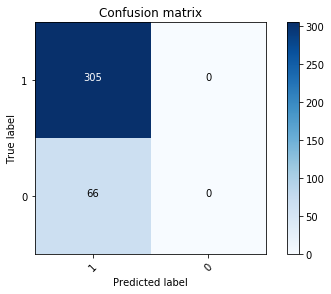

In [138]:
class_names = [1,0]

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()